In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [4]:
def names_file(file_year):
    PATH_TO_NAMES = "C:\\Users\\besonick\\Documents\\Repository\\netology\\Task_4.1\\names"
    names_file = os.path.join(PATH_TO_NAMES, '.'.join(('yob' + str(file_year), 'txt')))
    return names_file

In [5]:
def create_names_frame(year_start, year_end=0, step=1):
    names_by_year = {}
    if year_end == 0:
        names_by_year[year_start] = pd.read_csv(names_file(year_start), names=['Name','Gender','Count'])
        names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    else:
        for year in range(year_start, year_end, step):
            names_by_year[year] = pd.read_csv(names_file(year), names=['Name','Gender','Count'])
        names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    return names_all

def names_dynamics_by_period(names, year_start, year_end=0, step=1):
    names_all = create_names_frame(year_start, year_end, step)
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    name_dynamics = name_dynamics.query('Name == {}'.format(names)).unstack('Name')
    return name_dynamics

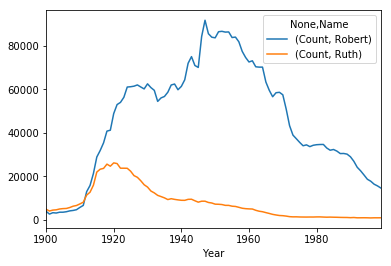

In [6]:
names = ['Ruth', 'Robert']
names_dynamics_by_period(names, 1900, 2000).plot()

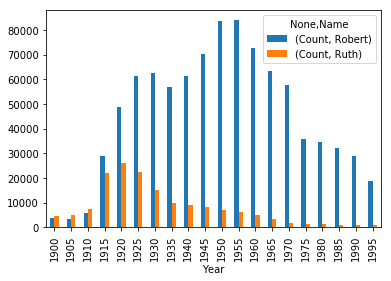

In [7]:
names_dynamics_by_period(names, 1900, 2000, 5).plot.bar()

In [ ]:
def top10_names_by_letter(letter, year_start, year_end=0, step=1):
    names_all = create_names_frame(year_start, year_end, step)
    name_frequency = names_all.groupby(['Name']).sum()
    name_frequency = name_frequency.loc[name_frequency.index.str.startswith(letter, na=False)]
    top10_names = name_frequency.sort_values(by='Count', ascending=False).head(10)
    return top10_names

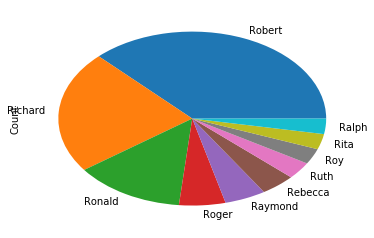

In [9]:
top10_names_by_letter('R', 1950).plot.pie(y='Count', legend=False)

In [52]:
def frequency_by_consonants(year_start, year_end=0, step=1):
    names_all = create_names_frame(year_start, year_end, step)
    name_frequency = names_all.groupby(['Name']).sum()
    vowels = 'aeuyoi'
    name_frequency['Cons'] = name_frequency.apply(lambda row: row.index, axis=0)
    name_frequency['Cons'] = name_frequency['Cons'].apply(lambda row: sum(letter not in vowels for letter in row.lower()))
    return name_frequency

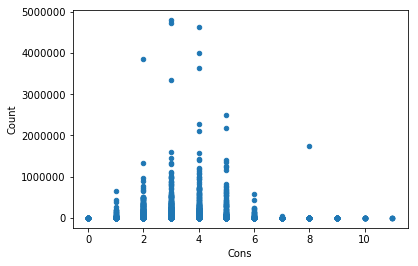

In [54]:
frequency_by_consonants(1900, 2000).plot.scatter(x='Cons', y='Count')